Name: Shobhit Verma<br>
Class: BE COMPS<br>
Batch: D<br>
Roll No: 33<br>
UID: 2018130062<br>

# Experiment - 4

In [1]:
import pandas as pd
import numpy as np
licensees = pd.read_csv("../input/federal-firearm-licensees.csv", index_col=0)[1:]
licensees.head(3)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (1,2,3,4,6,12,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Lic Regn,Lic Dist,Lic Cnty,Lic Type,Lic Xprdte,Lic Seqn,License Name,Business Name,Premise Street,Premise City,Premise State,Premise Zip Code,Mail Street,Mail City,Mail State,Mail Zip Code,Voice Phone
1,1,66,003,01,7L,00150,"SALAZAR-MORET, CHARLES",AGUADA SPORT SHOP & ARMORY,BO ASOMANTE CARR 115 KM 24-5,AGUADA,PR,00602,CALLE COLON #4 SUITE 3,AGUADA,PR,00602,7878686682
2,1,66,003,01,8F,00258,"HERNANDEZ-MUNOZ, GILBERTO",ARMERIA Y ACCESORIOS EL NARANJAL,CARR 411 KM 1.0 BO GUAYABO SECTOR BAJURA,AGUADA,PR,00602,4 REPTO MINERVA,AGUADA,PR,00602,7878680125
3,1,66,003,08,8H,00285,"SALAZAR MORET, CHARLES",AGUADA SPORT SHOP,BO ASOMANTE CARR 115 KM 24-5,AGUADA,PR,00602,CALLE COLON #4 SUITE 3,AGUADA,PR,00602,7878686682


In [2]:
licensees.describe()

,Lic Regn,Lic Dist,Lic Cnty,Lic Type,Lic Xprdte,Lic Seqn,License Name,Business Name,Premise Street,Premise City,Premise State,Premise Zip Code,Mail Street,Mail City,Mail State,Mail Zip Code,Voice Phone
count,80189,80189,80189,80189,80189,80189,80190,52422,80189,80189,80189,80189,80189,80188,80189,80189,8.017700e+04
unique,8,65,481,16,73,37240,69606,46275,76530,11645,55,29089,65549,11570,55,29471,7.488800e+04
top,5,59,13,1,0E,4309,WAL-MART STORES EAST LP,EZPAWN,16175 NW 49TH AVE,HOUSTON,TX,59901,508 SW 8TH STREET,BENTONVILLE,TX,727160500,3.105361e+09
freq,22706,3913,1748,34017,2884,12,1315,240,7,415,7795,58,2161,2321,8227,2215,4.040000e+02


Suppose we're interested in measuring the mean number of gun sale licensees by county. If we look at this data, here's what we find:

<AxesSubplot:ylabel='Frequency'>

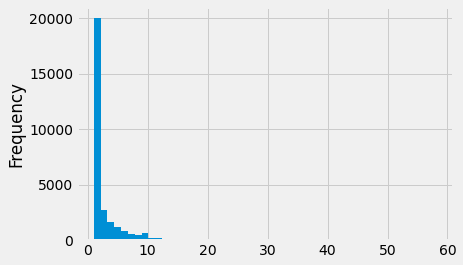

In [3]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
licensees['Premise Zip Code'].value_counts().plot.hist(bins=50)

(note that since I'm excluding counties which do not have *any* firearm stores, this is actually a flawed metric, but it's good enough for the purposes of demonstration!)

<!--
This chart makes it pretty obvious that the number of gun licensees per country variables wildly between different counties. That is to say, by looking at this histogram, we can conclude that the number of gun shops deviates geographically.

But suppose that we want to be more authoritative about this observation. We could pose this as a hypothesis. Our null hypothesis will be that "Gun shops in the United States are equivalently distributed", while our alternative hypothesis will be that "Gun shops in the United States are not equivalently distributed".
-->

We'll take the following mean:

In [4]:
licensees['Premise Zip Code'].value_counts().mean()

2.7566777819794424

Here are our hypotheses:

$$H_0: \bar{n} = 2.75$$
$$H_a: \bar{n} \neq 2.75$$

Let's set our p-level to 0.05. That is, let's say that we're willing to accept a 5% risk that when we reject the null hypothesis we are wrong.

Now we will implement our t-test. Here's a hand implementation first, to see what it looks like. Note that to get the p-value we'll just throw the number at the `scipy` normal distribution built-in because the normal distribution is non-trivial to simulate computationally.

In [5]:
X = licensees['Premise Zip Code'].value_counts()

In [6]:
import numpy as np
import scipy.stats as stats

def t_value(X, h_0):
    se = np.sqrt(np.var(X) / len(X))
    return (np.mean(X) - h_0) / se

def p_value(t):
    # Two-sided p-value, so we multiply by 2.
    return stats.norm.sf(abs(t))*2

t = t_value(X, 2.75)
p = p_value(t)

In [7]:
t, p

(0.3602713469802255, 0.7186442244499638)

The $t$ score tells us that our result is 0.36 standard deviations away from the average mean estimator result we can expect. 0.36 standard deviations is not a lot at all though! Our $p$ value tells us that almost 72% of possible mean estimate values are further away from our expectation than the value that we got.

In other words, a mean value of 2.75 is in the 72nd percentile of closeness.

Since $0.72 > 0.05$, we fail to reject the null hypothesis $H_0$. We conclude that there is strong evidence that $\bar{n} = 2.75$&mdash;that is, that the mean number of gun shops per US Zip Code is almost 3!

For reference, here is the usual way of performing this test using `scipy`:

In [8]:
import scipy.stats as stats

stats.ttest_1samp(a=X, popmean=2.75)

Ttest_1sampResult(statistic=0.36026515435690487, pvalue=0.718651470754852)

## Conclusion

Hypothesis testing is used extensively in the literature because it is a relatively simple and powerful tool for *making decisions*. Hypothesis testing allows us to state what level of confidence we want to have in some observation about our data, then, in testing that observation, determine whether or not we are satisfied that it is correct.

Another way of making this decision is to make it into a chart. For example, we could have randomly recomputed the mean of an increasing number of values in the dataset, and used that to determine how confident we are in our result. So for example, we'll take the mean of a single sample from the dataset; then the mean of two samples from the dataset; then three, and so on. Here's how that would look:

<AxesSubplot:>

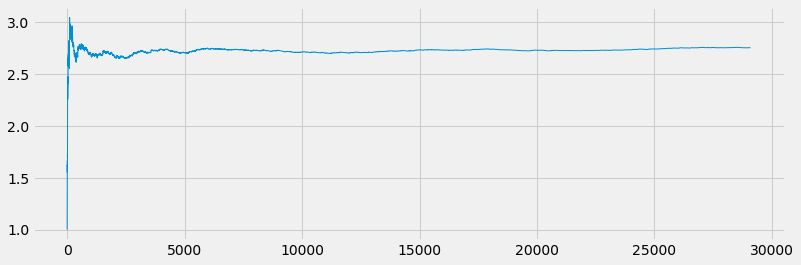

In [9]:
r = (licensees['Premise Zip Code']
         .value_counts()
         .sample(len(licensees['Premise Zip Code'].unique()) - 1))
pd.Series(r.cumsum() / np.array(range(1, len(r) + 1))).reset_index(drop=True).plot.line(
    figsize=(12, 4), linewidth=1
)

As you can see, the mean of our values stabilizes on the "true" value over time. No matter the amount of variance at the beginning of the distribution, by the end we have a very good idea that the real result is approximately 2.75.

Hypothesis testing is merely way of quantifying **how sure we are about this approximation**. It's important to do because a computer can't "look" at a graph; we mortals can, but we still need it too sometimes, because the graph is often times ambiguous, and sometimes we need to make a lot of decisions potentially very quickly without necessarily looking at all of the graphs.
